# Importing usefull libraries

In [1]:
# For http requests
import urllib.request
import requests

import pickle # For loading the models

# For image visualizations
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# API request

In [2]:
# Creating an API http request

url = "https://api.themoviedb.org/3/movie/{}?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US".format(38543)
response = requests.get(url)
print(response)

<Response [200]>


In [3]:
# Let us convert it to JSON and see the keys

response = response.json()
response.keys()

dict_keys(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'])

In [4]:
# Now we need the poster path

response['poster_path']

'/7ACf5GwwzmzuTFzPLEg9ZagvXUa.jpg'

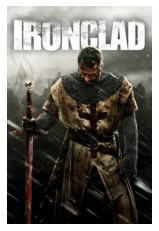

In [5]:
# Now that we got the last path let us concatenate it with an http API and see the image

image_api = "https://image.tmdb.org/t/p/w500/"
poster_path = response['poster_path']

response = requests.get(image_api+poster_path)
image = Image.open(BytesIO(response.content))
plt.imshow(image)
plt.axis('off')
plt.show()

# Creating a function to display the poster

In [6]:
# Let us create a function that will display the poster

def display_poster(movie_id):
    
    url = "https://api.themoviedb.org/3/movie/{}?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US".\
                            format(movie_id)
    response = requests.get(url)
    response = response.json()
    image_api = "https://image.tmdb.org/t/p/w500/"
    poster_path = response['poster_path']

    response = requests.get(image_api+poster_path)
    image = Image.open(BytesIO(response.content))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

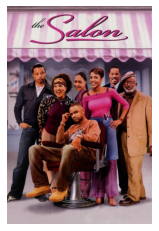

In [7]:
display_poster(51820)

# Creating a function to return poster path

In [13]:
# Let us create a function that will return path to the poster image

def fetch_poster(movie_id):
    
    url = "https://api.themoviedb.org/3/movie/{}?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US".\
                            format(movie_id)
    try:
        response = requests.get(url)
        response = response.json()
        image_api = "https://image.tmdb.org/t/p/w500/"
        poster_path = response['poster_path']
    except:
        return "The movie you passed doesn't exist"
    
    return image_api + poster_path

In [9]:
# Let us recieve the image path

poster_path = fetch_poster(10761)
poster_path

'https://image.tmdb.org/t/p/w500//pDg8D0jNqmz7RbCBgblWvmPswHE.jpg'

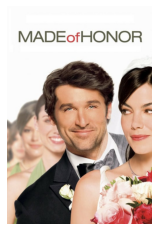

In [10]:
# Now let us display the image

response = requests.get(poster_path)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')
plt.show()

In [14]:
# Let us pass a dummy movie_id that doesn't exist

poster_path = fetch_poster('Micky')
poster_path

"The movie you passed doesn't exist"